In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("IMDb Movies India.csv", encoding='latin1')
dataset.shape


(15509, 10)

In [2]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [4]:
dataset.isnull().sum()
dataset.dropna(subset=["Rating"], inplace=True)
dataset.isnull().sum()
dataset.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)
dataset.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [8]:
dataset.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
dataset['Votes'] = dataset['Votes'].astype(str).str.replace(',', '').astype(int)
dataset['Year'] = dataset['Year'].astype(str).str.replace(r'[()]', '', regex=True).astype(int)
dataset['Duration'] = dataset['Duration'].astype(str).str.replace('min', '').str.strip()
dataset['Duration'] = dataset['Duration'].astype(float)
dataset['Duration'] = dataset['Duration'].fillna(dataset['Duration'].median())
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 649.5+ KB


In [11]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [28]:
dataset = pd.read_csv('IMDb Movies India.csv', encoding='cp1252')
top_movie = dataset.loc[dataset['Rating'].sort_values(ascending=False).index[:10]]


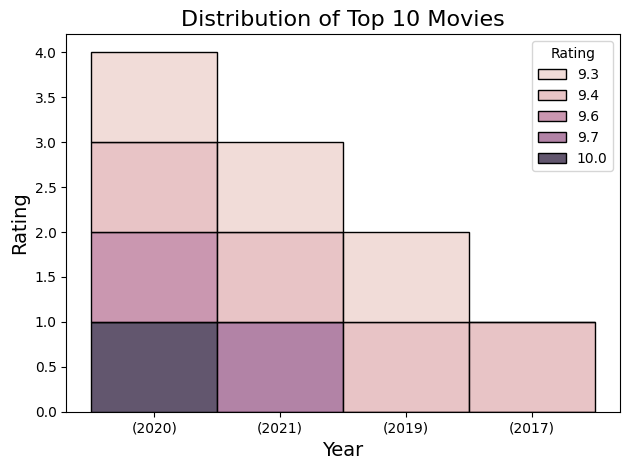

In [29]:

sns.histplot(data=top_movie, x="Year", hue="Rating", multiple="stack")
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()



In [30]:
genre_counts = dataset['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,2780
1,Action,1289
2,Thriller,779
3,Romance,708
4,"Drama, Romance",524


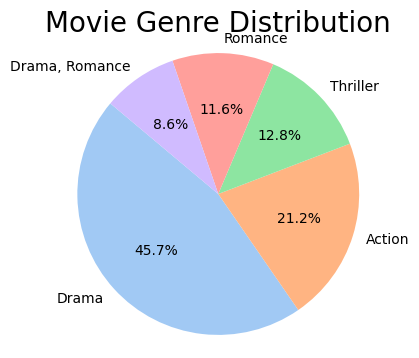

In [31]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution',fontsize=20)
plt.axis('equal')
plt.show()
     

             Director  Rating
4495  Saif Ali Sayeed    10.0
5154      Sriram Raja     9.7
1017      Bobby Kumar     9.6
3046     Munni Pankaj     9.4
5232   Suhrud Godbole     9.4
647     Arvind Pratap     9.4
675      Ashish Dubey     9.4
1563     Gautam Joshi     9.3
3796    Rahul Mallick     9.3
5650     Venkatesh Bk     9.3


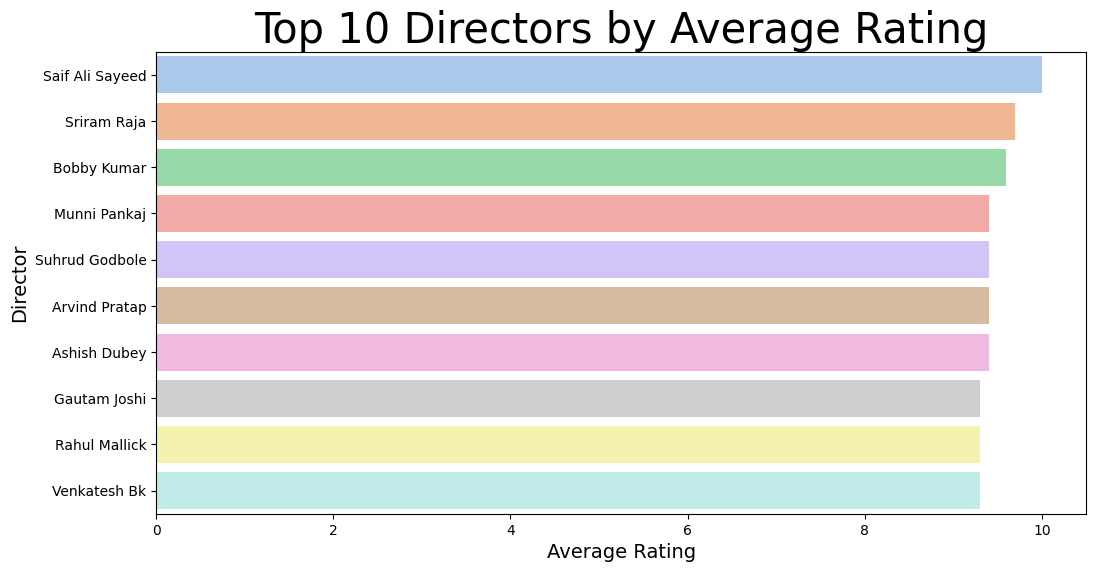

In [32]:
director_avg_rating = dataset.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
print(top_directors)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='pastel', hue='Director', legend=False)
plt.title('Top 10 Directors by Average Rating', fontsize=30)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)  # Adjusted fontsize for better appearance

plt.show()

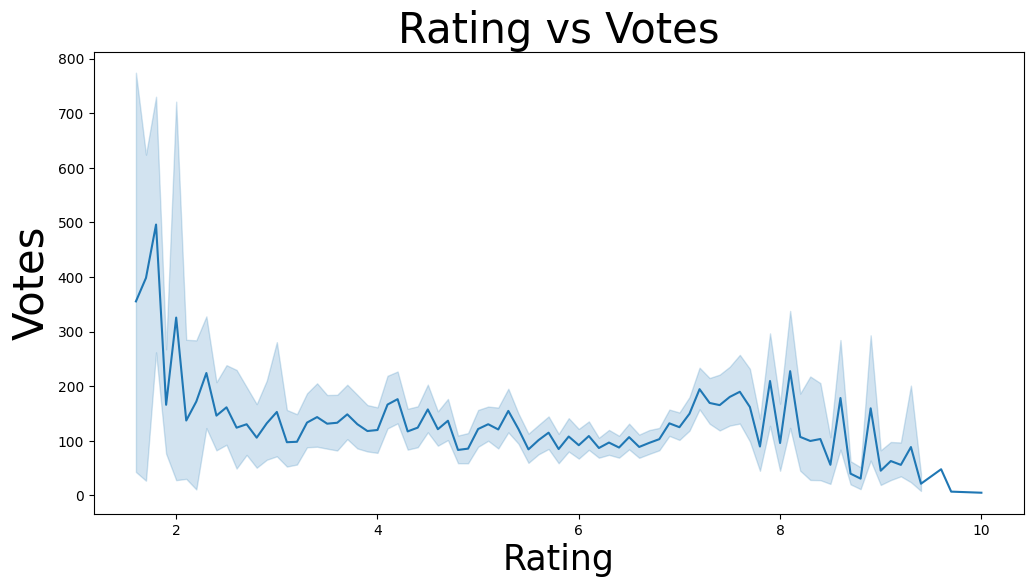

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='Rating', y='Votes')
plt.title('Rating vs Votes', fontsize=30)
plt.xlabel('Rating', fontsize=25)
plt.ylabel('Votes', fontsize=30)
plt.show()

     

In [63]:
actor_counts = dataset['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
print(top_n_actors)
     

                Actor  MovieCount
0           Jeetendra         138
1          Dharmendra         124
2  Mithun Chakraborty         124
3         Ashok Kumar         121
4       Rajesh Khanna         110
5           Dev Anand          89
6       Shashi Kapoor          87
7       Sanjeev Kumar          67
8          Sunil Dutt          57
9             Govinda          53


C:\Temp\ipykernel_41780\2192227686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h', palette='viridis')


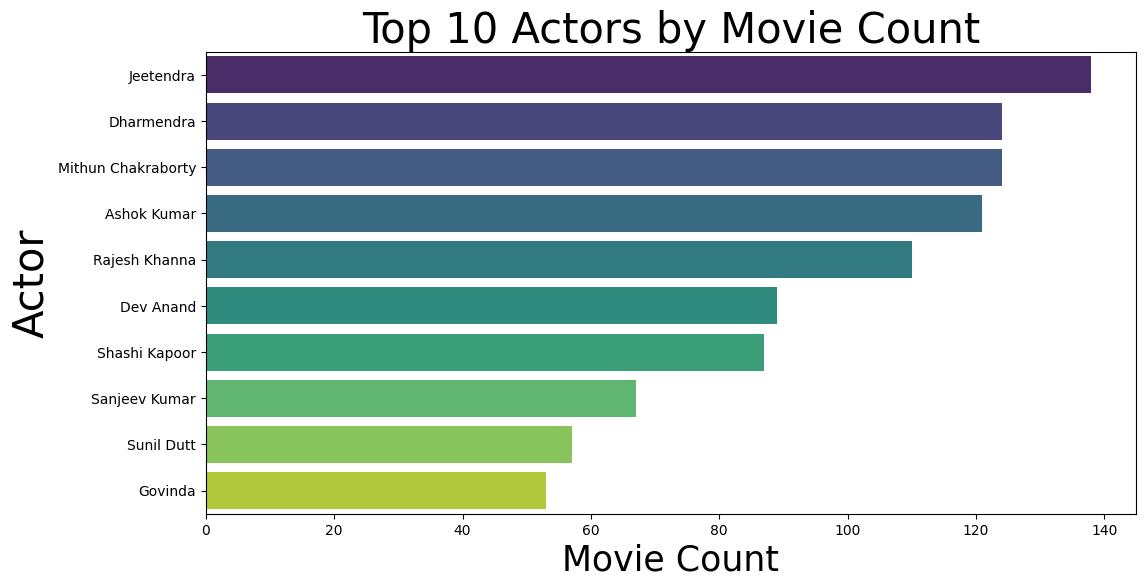

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h', palette='viridis')
plt.title('Top 10 Actors by Movie Count', fontsize=30)
plt.xlabel('Movie Count', fontsize=25)
plt.ylabel('Actor', fontsize=30)
plt.show()

In [65]:
yearly_movie_counts = dataset['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
print(yearly_movie_counts)

      Year  MovieCount
91  (1917)           1
90  (1931)           3
86  (1932)           6
87  (1933)           5
88  (1934)           5
..     ...         ...
0   (2017)         172
2   (2018)         158
1   (2019)         171
27  (2020)         102
55  (2021)          55

[92 rows x 2 columns]


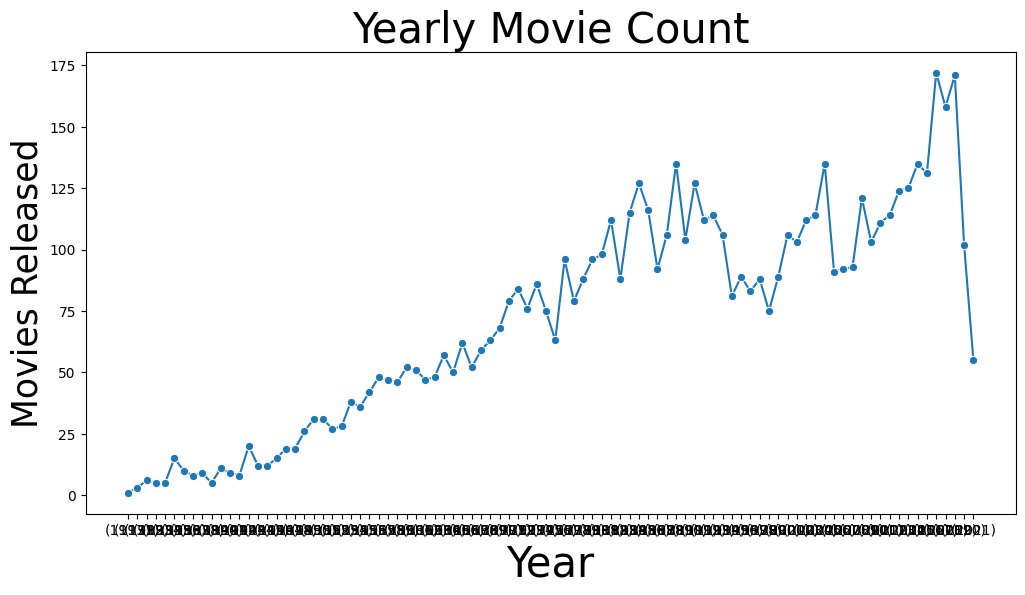

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount', marker='o')
plt.title('Yearly Movie Count', fontsize=30)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Movies Released', fontsize=25)
plt.show()

In [ ]:
filtered_df = dataset[(dataset['Rating'] >= 1) & (dataset['Votes'] > 1)]
filtered_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
